In [14]:
#!pip install h5py
#♣!pip install opencv-python

In [1]:
from PIL import Image
import numpy as np
import glob
import cv2
import h5py
import os
import rasterio
#with Image.open("hopper.jpg") as im:
#   im.rotate(45).show()

from numpy import asarray

In [2]:
images_dir = '../dataset_5bands/dataset/images/'
masks_dir = '../dataset_5bands/dataset/masks/'



In [43]:
from pathlib import Path

image_names =[]
for file  in Path(images_dir).glob('*.tif'):
    fileName = Path(file).stem + '.tif'
    image_names.append(os.path.join(images_dir, fileName))
image_names.sort()

images = []
for image in image_names:
    src = rasterio.open(image)
    bands =  np.zeros(shape=(256, 256,5)).astype(np.uint8)
    band1 = src.read(1).astype(np.uint8)
    band2 = src.read(2).astype(np.uint8)
    band3 = src.read(3).astype(np.uint8)
    band4 = src.read(4).astype(np.uint8)
    band5 = src.read(5).astype(np.uint8)
    bands[:,:,0] = band1
    bands[:,:,1] = band2
    bands[:,:,2] = band3
    bands[:,:,3] = band4
    bands[:,:,4] = band5
    
    images.append(bands)
    src.close()
image_dataset = np.array(images)
image_dataset.shape

(360, 256, 256, 5)

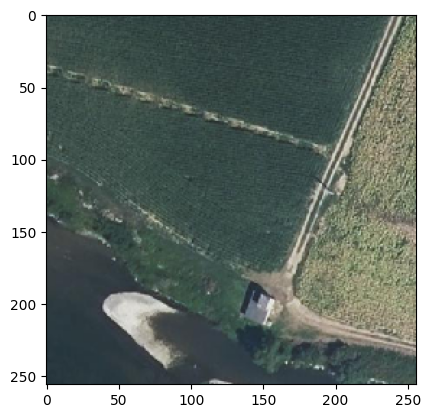

In [45]:
image = image_dataset[0]

image.astype(np.uint8)

import matplotlib.pyplot as plt

lum_img = image[:, :, 0:3]

imgplot = plt.imshow(lum_img)

#image[5].dtype



In [46]:
def save_h5_dataset(images, masks, filename):
        
    # ---- Create h5 file
    with h5py.File(filename, "w") as f:
        f.create_dataset("images", data=images)
        f.create_dataset("masks", data=masks)
        
    # ---- done
    size=os.path.getsize(filename)/(1024*1024)
    print('Dataset : {:24s}  shape : {:22s} size : {:6.1f} Mo   (saved)'.format(filename, str(images.shape),size))

In [47]:
save_h5_dataset(image_dataset, mask_dataset, '../dataset_5bands/dataset/5bands_3.h5' )

Dataset : ../dataset_5bands/dataset/5bands_3.h5  shape : (360, 256, 256, 5)     size :  135.0 Mo   (saved)


In [48]:
#lecture de données à partir de H5 file
images = []
masks = []
#h5py.File(f'{output_dir}/{dataset}.h5'
with  h5py.File('../dataset_5bands/dataset/5bands_3.h5','r') as f:
    images = f['images'][:]
    masks = f['masks'][:]
    print("dataset loaded from h5 file.")

dataset loaded from h5 file.


In [49]:
images.shape

(360, 256, 256, 5)

In [50]:
masks.shape

(360, 256, 256)